In [28]:
class Nodo:
    def __init__(self, cuerpo_celeste, letra):
        self.cuerpo_celeste = cuerpo_celeste
        self.letra = letra
        self.izq = None
        self.der = None

    
    def __str__(self):
        return f"{self.cuerpo_celeste} ({self.letra})"

In [29]:
class arbolB:
    def __init__(self):
        self.raiz = None

    def insertar(self, cuerpo_celeste, letra):
        if self.raiz is None:
            self.raiz = Nodo(cuerpo_celeste, letra)
        else:
            self._insertarR(self.raiz, cuerpo_celeste, letra)

    def _insertarR(self, raiz_act, cuerpo_celeste, letra):
        if letra < raiz_act.letra:
            if raiz_act.izq is None:
                raiz_act.izq = Nodo(cuerpo_celeste, letra)
            else:
                self._insertarR(raiz_act.izq, cuerpo_celeste, letra)
        else:
            if raiz_act.der is None:
                raiz_act.der = Nodo(cuerpo_celeste, letra)
            else:
                self._insertarR(raiz_act.der, cuerpo_celeste, letra)

    def preOrden(self):
        self._preOrdenR(self.raiz)
        print()

    def _preOrdenR(self, raiz_act):
        if raiz_act:
            print(raiz_act, end=" ")
            self._preOrdenR(raiz_act.izq)
            self._preOrdenR(raiz_act.der)

    def inOrden(self):
        self._inOrdenR(self.raiz)
        print()

    def _inOrdenR(self, raiz_act):
        if raiz_act:
            self._inOrdenR(raiz_act.izq)
            print(raiz_act, end=" ")
            self._inOrdenR(raiz_act.der)

    def postOrden(self):
        self._postOrdenR(self.raiz)
        print()

    def _postOrdenR(self, raiz_act):
        if raiz_act:
            self._postOrdenR(raiz_act.izq)
            self._postOrdenR(raiz_act.der)
            print(raiz_act, end=" ")

    def graficar(self):
        G = nx.DiGraph()
        self._agregarNodos(G, self.raiz)
        pos = self._posNodos(self.raiz)
        etiquetas = {str(n): str(n) for n in G.nodes()}
        nx.draw(G, pos, with_labels=True, labels=etiquetas,
                arrows=True, node_color="lightblue", node_size=1500,
                font_size=10, font_weight='bold', edge_color="gray")
        plt.title("Sistema Solar ordenado por letra")
        plt.show()

    def _agregarNodos(self, G, nodo):
        if nodo:
            G.add_node(str(nodo))
            if nodo.izq:
                G.add_edge(str(nodo), str(nodo.izq))
                self._agregarNodos(G, nodo.izq)
            if nodo.der:
                G.add_edge(str(nodo), str(nodo.der))
                self._agregarNodos(G, nodo.der)

    def _posNodos(self, nodo, x=0, y=0, pos=None, nivel=1):
        if pos is None:
            pos = {}
        if nodo:
            pos[str(nodo)] = (x, -y)
            if nodo.izq:
                self._posNodos(nodo.izq, x - 1 / (2 ** nivel), y + 1, pos, nivel + 1)
            if nodo.der:
                self._posNodos(nodo.der, x + 1 / (2 ** nivel), y + 1, pos, nivel + 1)
        return pos

In [30]:
import networkx as nx
import matplotlib.pyplot as plt


In [31]:
cuerpos = ["Sol", "Venus", "Mercurio", "Tierra", "Marte", "Jupiter", "Saturno", "Urano", "Neptuno"]
letras  = ["e",   "c",     "b",        "d",      "g",     "f",       "l",       "q",     "r"]

arbol = arbolB()
for cuerpo_celeste, letra in zip(cuerpos, letras):
    arbol.insertar(cuerpo_celeste, letra)

print("PreOrden:")
arbol.preOrden()

print("InOrden:")
arbol.inOrden()

print("PostOrden:")
arbol.postOrden()

PreOrden:
Sol (e) Venus (c) Mercurio (b) Tierra (d) Marte (g) Jupiter (f) Saturno (l) Urano (q) Neptuno (r) 
InOrden:
Mercurio (b) Venus (c) Tierra (d) Sol (e) Jupiter (f) Marte (g) Saturno (l) Urano (q) Neptuno (r) 
PostOrden:
Mercurio (b) Tierra (d) Venus (c) Jupiter (f) Neptuno (r) Urano (q) Saturno (l) Marte (g) Sol (e) 


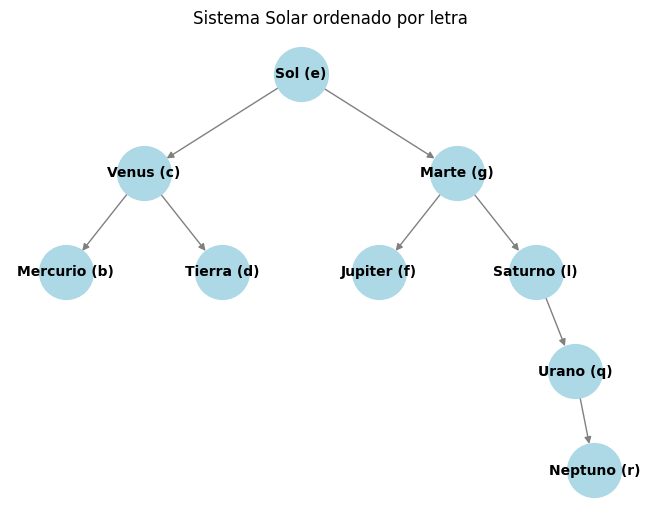

In [32]:
arbol.graficar()